# Feature Engineering for Player Actions

Here we are using 2 dataset as mentioned below.

1. BEFORE_Player actions features.csv
2. NetworkMeasuresFeatures.csv

Using Player action features, i am try to do feature Engineering , by creating the new feature like Log_Id count for each
Player (Actor & A_Acc) - currently i have taken only 10 Log_id for a reference, and the ratio of that 10 Log id used 
w.r.t the each player.

Note: in the input file BEFORE_Player actions features.csv

1. Actor	Player ID	These two features probably uniquely identify a player.
2. A_Acc	Player Account.	

3. Log ID	Type of Action in Game	Each log id represents a type of action.
4. Count	Count of action done	

The following table describes the player action type against the Log Id.
----------------------------------------------------------------------------------------------------              

    Log ID  ---	Action Type.

    143 --	Experience count.
    202 --	Obtaining items count.
    187 --	Earning game money.
    156 --	Abyss count or player kill count.
    148 --	Experience repair count.
    151 --	Use portal count.
    137 --	Killed by player count.
    138 --	Killed by non player count.
    142 --	Teleport count.
    146 --	Reborn count.




In [24]:
import pandas as pd
import numpy as np
#importing seaborn for statistical plots
import seaborn as sns

# Read the input file BEFORE_Player actions features.csv

In [2]:
PA_df = pd.read_csv("BEFORE_Player actions features.csv")
PA_df.info()
PA_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4885552 entries, 0 to 4885551
Data columns (total 4 columns):
Actor     int64
A_Acc     int64
Log_ID    int64
count     int64
dtypes: int64(4)
memory usage: 149.1 MB


Actor    A_Acc  Log_ID  count
0   1047  6482393     103     97
1   1047  6482393     104     97
2   1047  6482393     113      1
3   1047  6482393     118    508
4   1047  6482393     119    504

# Read the input file NetworkMeasuresFeatures.csv

In [3]:
nm_df = pd.read_csv("NetworkMeasuresFeatures.csv")
nm_df.info()
nm_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Columns: 105 entries, Actor to Type
dtypes: float64(42), int64(62), object(1)
memory usage: 39.8+ MB


Actor    A_Acc  a126_5_In_degree  a126_5_Out_degree  a126_5_Degree  \
0   1047  6482393                52                 59            111   
1   1049  6275719                 9                  8             17   
2   1120  6596993                 4                  2              6   
3   1164  6670686                 0                  7              7   
4   1184  4220231                 1                  9             10   

   a126_5_Weighted_degree  a126_5_Weighted_indegree  \
0                     204                        75   
1                      19                         9   
2                       6                         4   
3                       7                         0   
4                      13                         1   

   a126_5_Weighted_outdegree  a126_5_Eccentricity  \
0                        129                    9   
1                         10                   10   
2                          2                   10   
3                          7                    9   
4                         12                    9   

   a126_5_Closeness_centrality  ...    acha_5_Between_centrality  \
0                     3.415325  ...                  8900.804801   
1                     3.750757  ...                     0.000000   
2                     5.134877  ...                     0.000000   
3                     3.849654  ...                   147.338440   
4                     3.833427  ...                     0.000000   

   acha_5_Authority  acha_5_Hub  acha_5_Modularity_class  acha_5_Pagerank  \
0          0.000078    0.000081                       24         0.000073   
1          0.000000    0.000000                        0         0.000000   
2          0.000000    0.000000                        0         0.000000   
3          0.000009    0.000009                        6         0.000013   
4          0.000000    0.000000                        0         0.000000   

   acha_5_Component_ID  acha_5_str_conn_ID  acha_5_CC  acha_5_Eigenvector  \
0                    0                1429   0.045977            0.070818   
1                    0                   0   0.000000            0.000000   
2                    0                   0   0.000000            0.000000   
3                    1                2793   0.013889            0.009117   
4                    0                   0   0.000000            0.000000   

    Type  
0  Human  
1  Human  
2  Human  
3  Human  
4  Human  

[5 rows x 105 columns]

Pick the User type - Human or Bot from the Network Measures dataset w.r.t Player 

In [4]:
nm_HB_df = nm_df.loc[:,['Actor','A_Acc','Type']]
nm_HB_df.head(5)

Actor    A_Acc   Type
0   1047  6482393  Human
1   1049  6275719  Human
2   1120  6596993  Human
3   1164  6670686  Human
4   1184  4220231  Human

In [5]:
nm_HB_df.describe()

Actor         A_Acc
count   49739.000000  4.973900e+04
mean   344940.877058  8.483737e+06
std    127634.620397  1.963675e+06
min      1047.000000  0.000000e+00
25%    272154.000000  6.878566e+06
50%    400583.000000  8.290550e+06
75%    442200.500000  1.043333e+07
max    472898.000000  1.136939e+07

In [6]:
#my_tab = pd.crosstab(index=nm_df["Log_ID"],  # Make a crosstab
           #                   columns="count")      # Name the count column

##my_tab

In [7]:
arr = np.array([143,202,187,156,148,151,137,138,142])
arr

array([143, 202, 187, 156, 148, 151, 137, 138, 142])

In [8]:
# Filter the dataframe suing Filter/Query command and extract only few LOG_ID from the dataframe
#Log_ID	    -Action_Type
#137    -Killed_bypc_count.
#138 - Killed_bynpc_count.
#142    -Teleport_count.
#143    -Exp_get_count.
#146    -Reborn_count.
#148    -Exp_repair_count
#151    -Use_portal_count
#156    -Abyss_get_count
#187    -Money_get_count
#202    -Item_get_count

# df = df[df['col1'] != 'a1']

df= PA_df.query('[143,202,187,156,148,151,137,138,142,146] in Log_ID')
#df= nm_df.query('arr in Log_ID')
df.head(10)

Actor    A_Acc  Log_ID  count
12   1047  6482393     137    690
13   1047  6482393     138    172
16   1047  6482393     142   1051
17   1047  6482393     143  15060
19   1047  6482393     146      2
21   1047  6482393     148     66
22   1047  6482393     151      2
27   1047  6482393     156  10735
43   1047  6482393     187   9898
54   1047  6482393     202   6098

# Exploratory Data Analysis

In [9]:
# Trying convert coloumn (Log_Id) into rows

pivoted = df.pivot_table(index=['Actor','A_Acc'], columns='Log_ID',values='count', aggfunc='mean', fill_value=0)
#pivoted.head()

# Reset the index and the coloumn
pivoted = pivoted.reset_index()  

# remove the LOG_ID coloumn from the pivot table
pivoted.columns.name=None      
#pivoted.head()

#ivoted.columns.name=None 
#print (pivoted)
pivoted.head()

Actor    A_Acc  137  138   142    143  146  148  151    156   187   202
0   1047  6482393  690  172  1051  15060    2   66    2  10735  9898  6098
1   1049  6275719   30   16   118    540    0    3    2    113   299   274
2   1061  6575087    0    0     0     10    0    0    0      0     0     0
3   1106  6396087    0    0     0     29    0    0    0      0     9    12
4   1120  6596993    0   20    37    597    0   15    0      0   373   518

# Replace all the Log_Id number with Action_Type as mentioned below

Log_ID	-Action_Type

    137	-Killed_bypc_count.
    138 - Killed_bynpc_count.
    142	-Teleport_count.
    143	-Exp_get_count.
    146	-Reborn_count.
    148	-Exp_repair_count
    151	-Use_portal_count
    156	-Abyss_get_count
    187	-Money_get_count
    202	-Item_get_count


In [10]:
col_names = ['Actor', 'A_Acc','Killed_bypc_count','Killed_bynpc_count','Teleport_count','Exp_get_count','Reborn_count','Exp_repair_count',
'Use_portal_count','Abyss_get_count','Money_get_count','Item_get_count']
pivoted.columns = col_names

pivoted.head()

Actor    A_Acc  Killed_bypc_count  Killed_bynpc_count  Teleport_count  \
0   1047  6482393                690                 172            1051   
1   1049  6275719                 30                  16             118   
2   1061  6575087                  0                   0               0   
3   1106  6396087                  0                   0               0   
4   1120  6596993                  0                  20              37   

   Exp_get_count  Reborn_count  Exp_repair_count  Use_portal_count  \
0          15060             2                66                 2   
1            540             0                 3                 2   
2             10             0                 0                 0   
3             29             0                 0                 0   
4            597             0                15                 0   

   Abyss_get_count  Money_get_count  Item_get_count  
0            10735             9898            6098  
1              113              299             274  
2                0                0               0  
3                0                9              12  
4                0              373             518

Finding the total log_id 'count' of each Player by grouping Actor, A_Acc from the filtered dataset having 10 type of log_id.

In [11]:
df.head(5)

Actor    A_Acc  Log_ID  count
12   1047  6482393     137    690
13   1047  6482393     138    172
16   1047  6482393     142   1051
17   1047  6482393     143  15060
19   1047  6482393     146      2

In [12]:
#print("Finding the total log_id 'count' of each Player by grouping Actor and A_Acc")

Player_logid_count = df.groupby(['Actor','A_Acc'])['count'].sum().reset_index()
Player_logid_count.head(5)

Actor    A_Acc  count
0   1047  6482393  43774
1   1049  6275719   1395
2   1061  6575087     10
3   1106  6396087     50
4   1120  6596993   1560

In [13]:
# Rename the coloumn name count to  Total_LogId_Count

col_names1 = ['Actor', 'A_Acc','Total_Logid_count']
Player_logid_count.columns = col_names1
Player_logid_count.head(5)

Actor    A_Acc  Total_Logid_count
0   1047  6482393              43774
1   1049  6275719               1395
2   1061  6575087                 10
3   1106  6396087                 50
4   1120  6596993               1560

In [14]:
# Merge 2 dataset (Player_logid_count,pivoted) to find the ratio feature of eacj Log_id w.r.t players.

PA_ratio_count = pd.merge(Player_logid_count,pivoted, how='inner', on=['Actor', 'A_Acc'])
PA_ratio_count.head()

Actor    A_Acc  Total_Logid_count  Killed_bypc_count  Killed_bynpc_count  \
0   1047  6482393              43774                690                 172   
1   1049  6275719               1395                 30                  16   
2   1061  6575087                 10                  0                   0   
3   1106  6396087                 50                  0                   0   
4   1120  6596993               1560                  0                  20   

   Teleport_count  Exp_get_count  Reborn_count  Exp_repair_count  \
0            1051          15060             2                66   
1             118            540             0                 3   
2               0             10             0                 0   
3               0             29             0                 0   
4              37            597             0                15   

   Use_portal_count  Abyss_get_count  Money_get_count  Item_get_count  
0                 2            10735             9898            6098  
1                 2              113              299             274  
2                 0                0                0               0  
3                 0                0                9              12  
4                 0                0              373             518

In [15]:
# Caluclate the Player_Action_ratio using Player_Action_Count and Total_Logid_count

PA_ratio_count['Killed_bypc_ratio']  = PA_ratio_count['Killed_bypc_count']/PA_ratio_count['Total_Logid_count'] 
PA_ratio_count['Killed_bynpc_ratio'] = PA_ratio_count['Killed_bynpc_count']/PA_ratio_count['Total_Logid_count'] 
PA_ratio_count['Teleport_ratio']     = PA_ratio_count['Teleport_count']/PA_ratio_count['Total_Logid_count'] 
PA_ratio_count['Exp_get_ratio']      = PA_ratio_count['Exp_get_count']/PA_ratio_count['Total_Logid_count'] 
PA_ratio_count['Reborn_ratio']       = PA_ratio_count['Reborn_count']/PA_ratio_count['Total_Logid_count'] 
PA_ratio_count['Exp_repair_ratio']   = PA_ratio_count['Exp_repair_count']/PA_ratio_count['Total_Logid_count'] 
PA_ratio_count['Use_portal_ratio']   = PA_ratio_count['Use_portal_count']/PA_ratio_count['Total_Logid_count'] 
PA_ratio_count['Abyss_get_ratio']    = PA_ratio_count['Abyss_get_count']/PA_ratio_count['Total_Logid_count'] 
PA_ratio_count['Money_get_ratio']    = PA_ratio_count['Money_get_count']/PA_ratio_count['Total_Logid_count'] 
PA_ratio_count['Item_get_ratio']     = PA_ratio_count['Item_get_count']/PA_ratio_count['Total_Logid_count'] 

PA_ratio_count.head()

Actor    A_Acc  Total_Logid_count  Killed_bypc_count  Killed_bynpc_count  \
0   1047  6482393              43774                690                 172   
1   1049  6275719               1395                 30                  16   
2   1061  6575087                 10                  0                   0   
3   1106  6396087                 50                  0                   0   
4   1120  6596993               1560                  0                  20   

   Teleport_count  Exp_get_count  Reborn_count  Exp_repair_count  \
0            1051          15060             2                66   
1             118            540             0                 3   
2               0             10             0                 0   
3               0             29             0                 0   
4              37            597             0                15   

   Use_portal_count       ...        Killed_bypc_ratio  Killed_bynpc_ratio  \
0                 2       ...                 0.015763            0.003929   
1                 2       ...                 0.021505            0.011470   
2                 0       ...                 0.000000            0.000000   
3                 0       ...                 0.000000            0.000000   
4                 0       ...                 0.000000            0.012821   

   Teleport_ratio  Exp_get_ratio  Reborn_ratio  Exp_repair_ratio  \
0        0.024010       0.344040      0.000046          0.001508   
1        0.084588       0.387097      0.000000          0.002151   
2        0.000000       1.000000      0.000000          0.000000   
3        0.000000       0.580000      0.000000          0.000000   
4        0.023718       0.382692      0.000000          0.009615   

   Use_portal_ratio  Abyss_get_ratio  Money_get_ratio  Item_get_ratio  
0          0.000046         0.245237         0.226116        0.139306  
1          0.001434         0.081004         0.214337        0.196416  
2          0.000000         0.000000         0.000000        0.000000  
3          0.000000         0.000000         0.180000        0.240000  
4          0.000000         0.000000         0.239103        0.332051  

[5 rows x 23 columns]

In [16]:
# Rearrange the coloumn name w.r.t Player_Action_ratio and Player_Action_Count adjacent to each other.

PA_ratio_count = PA_ratio_count[['Actor', 'A_Acc','Total_Logid_count','Killed_bypc_ratio','Killed_bypc_count','Killed_bynpc_ratio',
                         'Killed_bynpc_count','Teleport_ratio','Teleport_count','Exp_get_ratio','Exp_get_count',
                         'Reborn_ratio','Reborn_count','Exp_repair_ratio','Exp_repair_count','Use_portal_ratio',
                         'Use_portal_count','Abyss_get_ratio','Abyss_get_count','Money_get_ratio','Money_get_count',
                         'Item_get_ratio','Item_get_count']]

PA_ratio_count.head()

Actor    A_Acc  Total_Logid_count  Killed_bypc_ratio  Killed_bypc_count  \
0   1047  6482393              43774           0.015763                690   
1   1049  6275719               1395           0.021505                 30   
2   1061  6575087                 10           0.000000                  0   
3   1106  6396087                 50           0.000000                  0   
4   1120  6596993               1560           0.000000                  0   

   Killed_bynpc_ratio  Killed_bynpc_count  Teleport_ratio  Teleport_count  \
0            0.003929                 172        0.024010            1051   
1            0.011470                  16        0.084588             118   
2            0.000000                   0        0.000000               0   
3            0.000000                   0        0.000000               0   
4            0.012821                  20        0.023718              37   

   Exp_get_ratio       ...        Exp_repair_ratio  Exp_repair_count  \
0       0.344040       ...                0.001508                66   
1       0.387097       ...                0.002151                 3   
2       1.000000       ...                0.000000                 0   
3       0.580000       ...                0.000000                 0   
4       0.382692       ...                0.009615                15   

   Use_portal_ratio  Use_portal_count  Abyss_get_ratio  Abyss_get_count  \
0          0.000046                 2         0.245237            10735   
1          0.001434                 2         0.081004              113   
2          0.000000                 0         0.000000                0   
3          0.000000                 0         0.000000                0   
4          0.000000                 0         0.000000                0   

   Money_get_ratio  Money_get_count  Item_get_ratio  Item_get_count  
0         0.226116             9898        0.139306            6098  
1         0.214337              299        0.196416             274  
2         0.000000                0        0.000000               0  
3         0.180000                9        0.240000              12  
4         0.239103              373        0.332051             518  

[5 rows x 23 columns]

# Now MERGE the Network dataset to know the Player action which is Human or bot in Player_Action_feature dataset

In [17]:
Player_Action_feature = pd.merge(PA_ratio_count, nm_HB_df, how='inner', on=['Actor', 'A_Acc'])
Player_Action_feature.head()

Actor    A_Acc  Total_Logid_count  Killed_bypc_ratio  Killed_bypc_count  \
0   1047  6482393              43774           0.015763                690   
1   1049  6275719               1395           0.021505                 30   
2   1120  6596993               1560           0.000000                  0   
3   1164  6670686               1715           0.015160                 26   
4   1184  4220231               1925           0.003117                  6   

   Killed_bynpc_ratio  Killed_bynpc_count  Teleport_ratio  Teleport_count  \
0            0.003929                 172        0.024010            1051   
1            0.011470                  16        0.084588             118   
2            0.012821                  20        0.023718              37   
3            0.003499                   6        0.035569              61   
4            0.008831                  17        0.028052              54   

   Exp_get_ratio  ...    Exp_repair_count  Use_portal_ratio  Use_portal_count  \
0       0.344040  ...                  66          0.000046                 2   
1       0.387097  ...                   3          0.001434                 2   
2       0.382692  ...                  15          0.000000                 0   
3       0.364431  ...                   0          0.000000                 0   
4       0.471688  ...                   3          0.000000                 0   

   Abyss_get_ratio  Abyss_get_count  Money_get_ratio  Money_get_count  \
0         0.245237            10735         0.226116             9898   
1         0.081004              113         0.214337              299   
2         0.000000                0         0.239103              373   
3         0.165015              283         0.276385              474   
4         0.032727               63         0.243117              468   

   Item_get_ratio  Item_get_count   Type  
0        0.139306            6098  Human  
1        0.196416             274  Human  
2        0.332051             518  Human  
3        0.139942             240  Human  
4        0.210909             406  Human  

[5 rows x 24 columns]

# Check for null values in the data 

In [18]:
Player_Action_feature.isnull().sum()

Actor                 0
A_Acc                 0
Total_Logid_count     0
Killed_bypc_ratio     0
Killed_bypc_count     0
Killed_bynpc_ratio    0
Killed_bynpc_count    0
Teleport_ratio        0
Teleport_count        0
Exp_get_ratio         0
Exp_get_count         0
Reborn_ratio          0
Reborn_count          0
Exp_repair_ratio      0
Exp_repair_count      0
Use_portal_ratio      0
Use_portal_count      0
Abyss_get_ratio       0
Abyss_get_count       0
Money_get_ratio       0
Money_get_count       0
Item_get_ratio        0
Item_get_count        0
Type                  0
dtype: int64

In [19]:
#Lets analysze the distribution of the various attributes
Player_Action_feature.describe().transpose()

count          mean           std      min  \
Actor               49584.0  3.449277e+05  1.276747e+05   1047.0   
A_Acc               49584.0  8.486798e+06  1.956481e+06  15272.0   
Total_Logid_count   49584.0  3.457435e+04  8.602509e+04      1.0   
Killed_bypc_ratio   49584.0  3.421503e-03  1.609127e-02      0.0   
Killed_bypc_count   49584.0  9.604296e+01  2.921525e+02      0.0   
Killed_bynpc_ratio  49584.0  5.380089e-03  9.189219e-03      0.0   
Killed_bynpc_count  49584.0  9.422251e+01  1.919958e+02      0.0   
Teleport_ratio      49584.0  3.168965e-02  5.592229e-02      0.0   
Teleport_count      49584.0  4.541978e+02  8.059808e+02      0.0   
Exp_get_ratio       49584.0  3.742630e-01  1.302150e-01      0.0   
Exp_get_count       49584.0  1.359131e+04  3.803479e+04      0.0   
Reborn_ratio        49584.0  1.221396e-04  7.488900e-04      0.0   
Reborn_count        49584.0  4.301630e+00  3.125743e+01      0.0   
Exp_repair_ratio    49584.0  2.049619e-03  3.670990e-03      0.0   
Exp_repair_count    49584.0  2.037048e+01  4.530589e+01      0.0   
Use_portal_ratio    49584.0  1.402276e-04  1.724749e-03      0.0   
Use_portal_count    49584.0  9.881817e-01  3.263916e+00      0.0   
Abyss_get_ratio     49584.0  6.198138e-02  8.682710e-02      0.0   
Abyss_get_count     49584.0  2.341692e+03  5.967466e+03      0.0   
Money_get_ratio     49584.0  1.674888e-01  1.268200e-01      0.0   
Money_get_count     49584.0  4.399147e+03  1.439906e+04      0.0   
Item_get_ratio      49584.0  3.534637e-01  1.852105e-01      0.0   
Item_get_count      49584.0  1.357207e+04  4.224471e+04      0.0   

                             25%           50%           75%           max  
Actor               2.721545e+05  4.005705e+05  4.422598e+05  4.728980e+05  
A_Acc               6.879272e+06  8.290749e+06  1.043205e+07  1.136939e+07  
Total_Logid_count   1.263000e+03  6.082000e+03  2.964750e+04  1.318991e+06  
Killed_bypc_ratio   0.000000e+00  4.827425e-04  2.721374e-03  6.270149e-01  
Killed_bypc_count   0.000000e+00  3.000000e+00  4.500000e+01  7.388000e+03  
Killed_bynpc_ratio  1.034126e-03  3.604839e-03  6.976822e-03  5.000000e-01  
Killed_bynpc_count  3.000000e+00  1.900000e+01  9.600000e+01  4.552000e+03  
Teleport_ratio      1.353582e-02  2.339446e-02  3.447442e-02  1.000000e+00  
Teleport_count      2.700000e+01  1.170000e+02  4.910000e+02  1.433600e+04  
Exp_get_ratio       3.447484e-01  3.939415e-01  4.403863e-01  1.000000e+00  
Exp_get_count       4.730000e+02  2.204500e+03  1.044200e+04  5.629440e+05  
Reborn_ratio        0.000000e+00  0.000000e+00  4.973919e-05  8.888889e-02  
Reborn_count        0.000000e+00  0.000000e+00  1.000000e+00  1.869000e+03  
Exp_repair_ratio    0.000000e+00  9.654262e-04  2.863962e-03  1.842105e-01  
Exp_repair_count    0.000000e+00  5.000000e+00  2.100000e+01  1.464000e+03  
Use_portal_ratio    0.000000e+00  0.000000e+00  0.000000e+00  1.111111e-01  
Use_portal_count    0.000000e+00  0.000000e+00  0.000000e+00  9.100000e+01  
Abyss_get_ratio     0.000000e+00  6.674661e-03  1.125270e-01  8.217391e-01  
Abyss_get_count     0.000000e+00  3.000000e+01  1.102000e+03  1.324450e+05  
Money_get_ratio     8.839240e-02  1.676013e-01  2.198678e-01  1.000000e+00  
Money_get_count     1.420000e+02  6.340000e+02  3.212500e+03  3.321420e+05  
Item_get_ratio      2.310617e-01  3.294902e-01  4.266667e-01  1.000000e+00  
Item_get_count      4.120000e+02  1.862000e+03  8.771750e+03  1.076296e+06

In [20]:
# Let us look at the target column which is 'Type' to understand how the data is distributed amongst the various values
# Type 0 - Bot
# Type 1 - Human

Player_Action_feature.groupby(["Type"]).count()

Actor  A_Acc  Total_Logid_count  Killed_bypc_ratio  Killed_bypc_count  \
Type                                                                           
Bot     7692   7692               7692               7692               7692   
Human  41892  41892              41892              41892              41892   

       Killed_bynpc_ratio  Killed_bynpc_count  Teleport_ratio  Teleport_count  \
Type                                                                            
Bot                  7692                7692            7692            7692   
Human               41892               41892           41892           41892   

       Exp_get_ratio       ...        Exp_repair_ratio  Exp_repair_count  \
Type                       ...                                             
Bot             7692       ...                    7692              7692   
Human          41892       ...                   41892             41892   

       Use_portal_ratio  Use_portal_count  Abyss_get_ratio  Abyss_get_count  \
Type                                                                          
Bot                7692              7692             7692             7692   
Human             41892             41892            41892            41892   

       Money_get_ratio  Money_get_count  Item_get_ratio  Item_get_count  
Type                                                                     
Bot               7692             7692            7692            7692  
Human            41892            41892           41892           41892  

[2 rows x 23 columns]

Most are Human. The ratio is almost 6:1 Human Vs Bot.  The model's ability to predict Type (Human) 1 will 
be better than predicting Type (Bot) 0. 

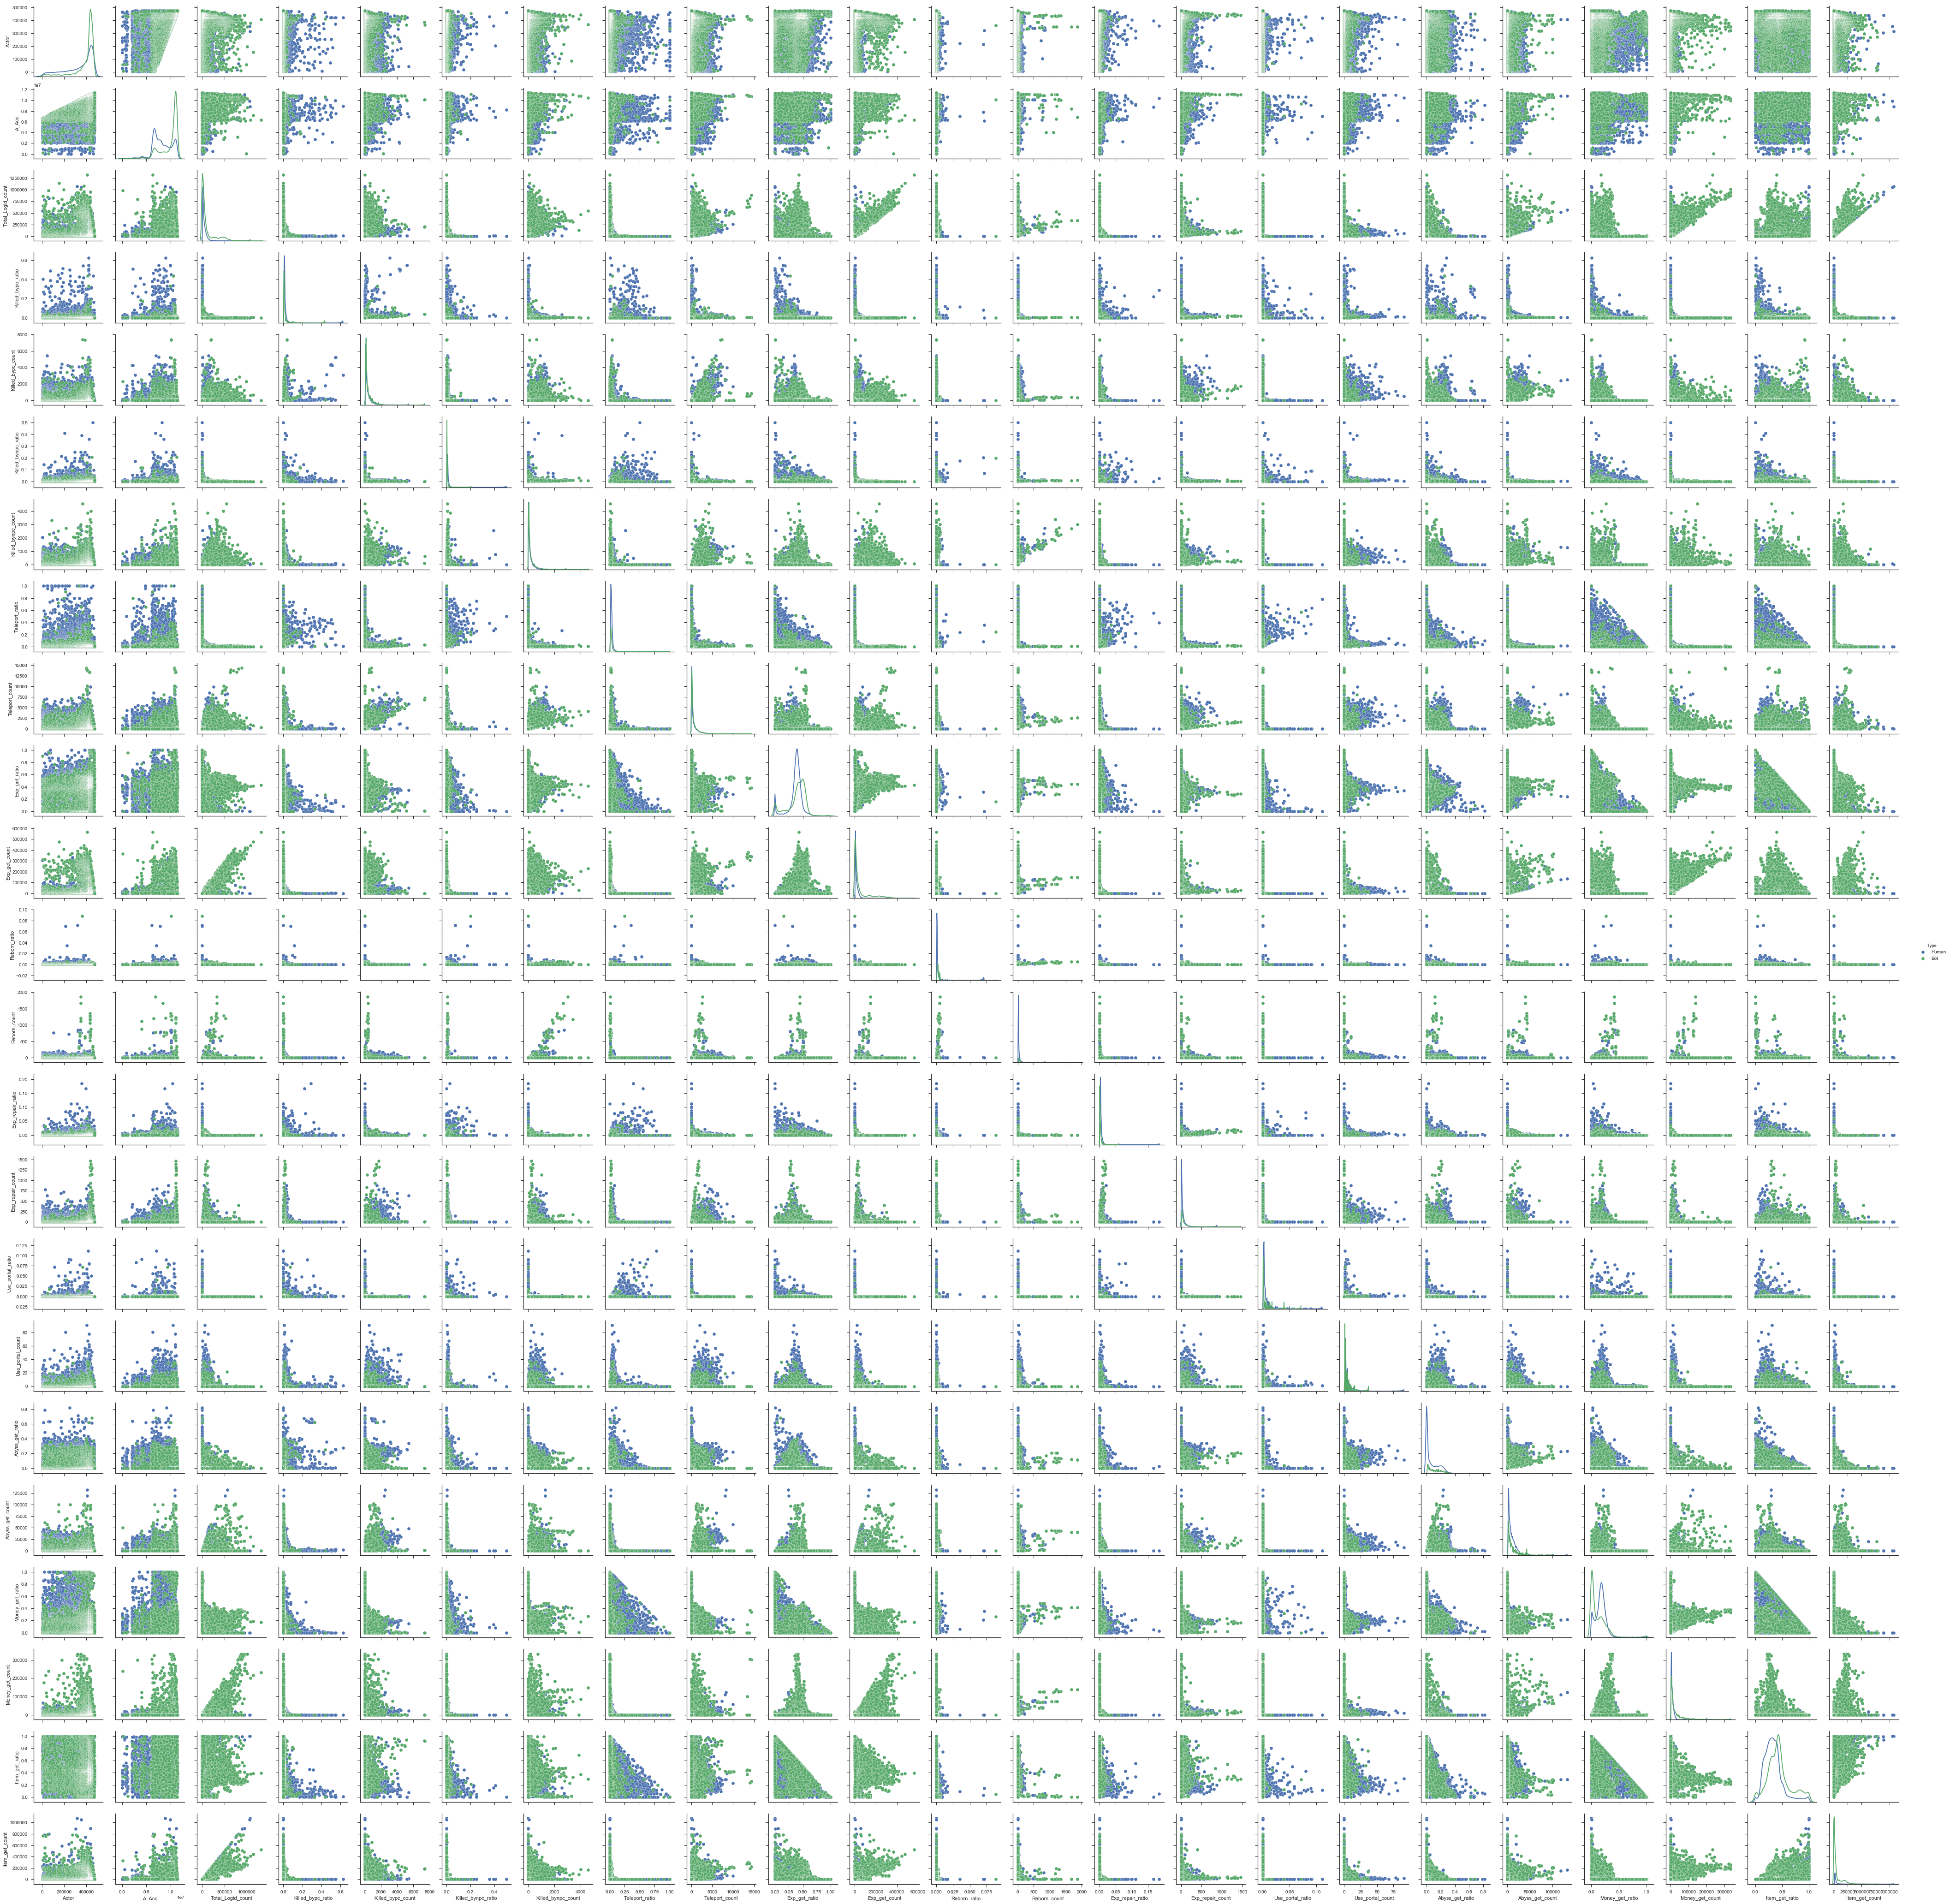

In [193]:
# Pairplot using sns

sns.pairplot(Player_Action_feature , hue='Type' , diag_kind = 'kde')

In [21]:
Player_Action_feature.corr()

Actor     A_Acc  Total_Logid_count  Killed_bypc_ratio  \
Actor               1.000000  0.490915          -0.021201          -0.095138   
A_Acc               0.490915  1.000000           0.143196          -0.061635   
Total_Logid_count  -0.021201  0.143196           1.000000          -0.016076   
Killed_bypc_ratio  -0.095138 -0.061635          -0.016076           1.000000   
Killed_bypc_count  -0.171719 -0.058377           0.330713           0.279509   
Killed_bynpc_ratio -0.007081 -0.009654          -0.116119           0.117047   
Killed_bynpc_count -0.112281  0.016934           0.459756           0.060492   
Teleport_ratio     -0.104868 -0.116499          -0.133341           0.247447   
Teleport_count     -0.171422 -0.045785           0.436411           0.104447   
Exp_get_ratio       0.259741  0.160028           0.058154          -0.117444   
Exp_get_count       0.013165  0.159408           0.939024          -0.020626   
Reborn_ratio       -0.069615 -0.037767           0.001222           0.034622   
Reborn_count       -0.044790 -0.011192           0.126198           0.013100   
Exp_repair_ratio    0.131930  0.057414          -0.159896           0.095226   
Exp_repair_count    0.022297  0.036717           0.087833           0.059355   
Use_portal_ratio   -0.019457 -0.023104          -0.026017           0.171327   
Use_portal_count   -0.039576 -0.035853           0.065297           0.125209   
Abyss_get_ratio    -0.368472 -0.237703           0.026606           0.233171   
Abyss_get_count    -0.242759 -0.107714           0.342673           0.078306   
Money_get_ratio    -0.001836 -0.039608          -0.127565          -0.042640   
Money_get_count    -0.039698  0.063650           0.671884           0.002482   
Item_get_ratio      0.029511  0.066286           0.084814          -0.168568   
Item_get_count     -0.002221  0.142769           0.900594          -0.030358   

                    Killed_bypc_count  Killed_bynpc_ratio  Killed_bynpc_count  \
Actor                       -0.171719           -0.007081           -0.112281   
A_Acc                       -0.058377           -0.009654            0.016934   
Total_Logid_count            0.330713           -0.116119            0.459756   
Killed_bypc_ratio            0.279509            0.117047            0.060492   
Killed_bypc_count            1.000000           -0.002776            0.599670   
Killed_bynpc_ratio          -0.002776            1.000000            0.075433   
Killed_bynpc_count           0.599670            0.075433            1.000000   
Teleport_ratio              -0.008260            0.285385           -0.052797   
Teleport_count               0.764339           -0.003323            0.778965   
Exp_get_ratio               -0.054313            0.084022            0.048762   
Exp_get_count                0.270079           -0.104833            0.423941   
Reborn_ratio                 0.043769            0.212341            0.125920   
Reborn_count                 0.164146            0.022526            0.461244   
Exp_repair_ratio            -0.078215            0.401761           -0.083368   
Exp_repair_count             0.379752            0.059491            0.394762   
Use_portal_ratio            -0.006968            0.145743           -0.017761   
Use_portal_count             0.381240            0.067177            0.345074   
Abyss_get_ratio              0.377604            0.054342            0.327776   
Abyss_get_count              0.660050           -0.023605            0.637757   
Money_get_ratio             -0.012396            0.030530            0.013439   
Money_get_count              0.300764           -0.057132            0.443251   
Item_get_ratio              -0.150561           -0.261586           -0.188895   
Item_get_count               0.209749           -0.119611            0.289017   

                    Teleport_ratio  Teleport_count  Exp_get_ratio  \
Actor                    -0.104868       -0.171422       0.259741   
A_Acc              

In [22]:
# Player_Action_feature.groupby('Type').hist()

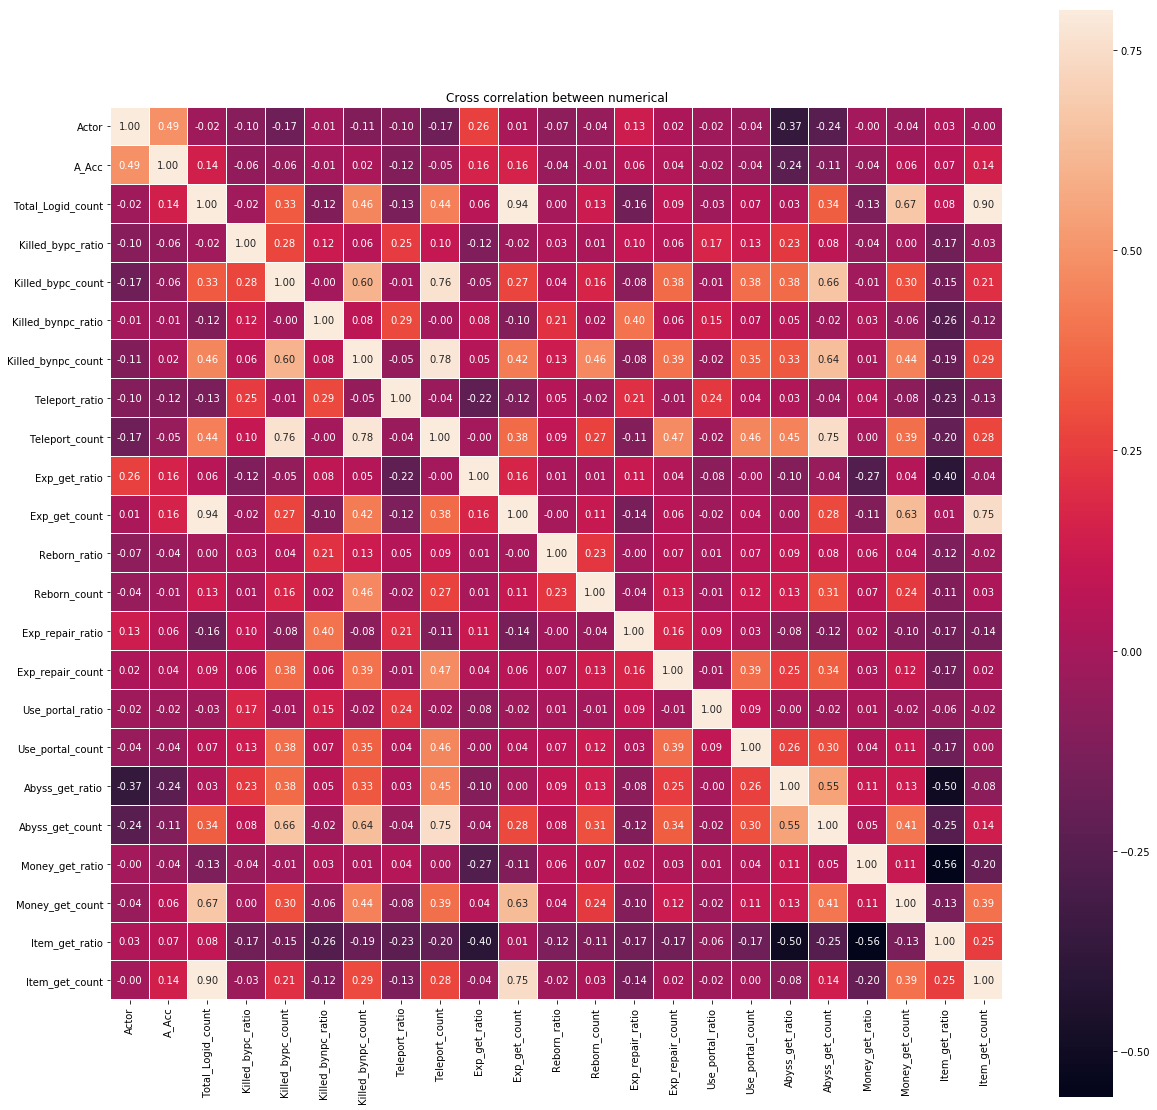

In [26]:
from matplotlib import pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns

plt.figure(figsize=(20, 20))
ax = sns.heatmap(Player_Action_feature
                 .corr(),vmax=.8, square=True,fmt='.2f',  annot=True,  linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()

# We can see the below coloumns are  co-related.

    1. Total_Logid_count and Exp_get_count ,
    2. Total_Logid_count and Item_get_count,
    3. Killed_bypc_count and Teleport_count,
    4. Killed_bynpc_count and Teleport_count,
    5. Abyss_get_ratio and Teleport_count


# Plot historgram plot to check which Player action type is having more, Here we have to use the 

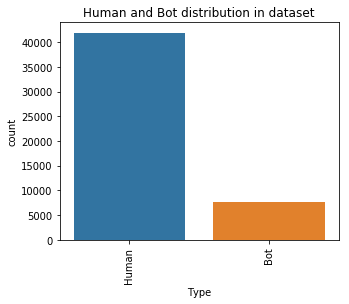

In [50]:
from matplotlib import pyplot as plt
# to bring the plot picture size of width 10 and height 5
plt.figure(figsize=(5,4))
# count plot on Make vs cardata_df
sns.countplot(x='Type', data=Player_Action_feature)
# to display the Make name vertical in X- axis
plt.xticks(rotation='vertical')
plt.title('Human and Bot distribution in dataset')
plt.show()

# Analyzing data for '143 -Experience count' feature

In [28]:
#  """Entry point for launching an IPython kernel.
from scipy.stats import zscore
Exp_get_count_z = Player_Action_feature[['Exp_get_count']]
#party_df_degree_z.PartyPlay_Degree = ((party_df.PartyPlay_Degree - party_df.PartyPlay_Degree.mean()) /
#                                      (party_df.PartyPlay_Degree.std()))
Exp_get_count_z = Exp_get_count_z.apply(zscore)
Exp_get_count_z.head()

Exp_get_count
0       0.038615
1      -0.343145
2      -0.341646
3      -0.340910
4      -0.333469

In [29]:
from sklearn.cluster import KMeans

In [30]:
cluster_range = range( 2, 20)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters, random_state=7, n_init=10)
    clusters.fit(Exp_get_count_z)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

num_clusters  cluster_errors
0              2    10454.509358
1              3     6185.823325
2              4     3022.336053
3              5     2161.894062
4              6     1468.103867
5              7     1137.809479
6              8      895.213578
7              9      719.447316
8             10      597.042106
9             11      499.088930
10            12      426.569414
11            13      369.903182
12            14      316.602136
13            15      274.024326
14            16      241.685155
15            17      213.825431
16            18      191.446352
17            19      174.102772

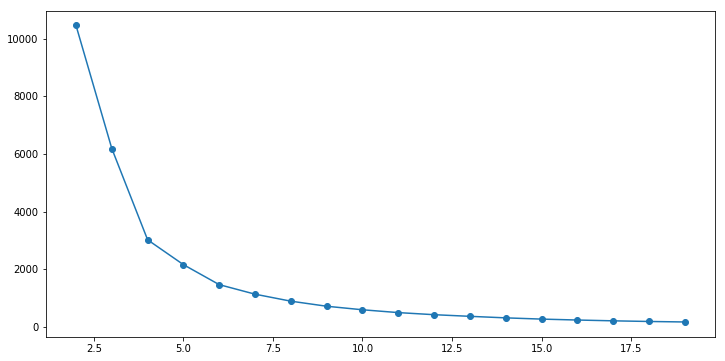

In [31]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [32]:
# From the above, it seems that we can take the number of clusters as 6 where we get the elbow.
# For below, we will take num clusters to 15, so as to see the distribution of values clearly

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000239A0940E48>,
      dtype=object)

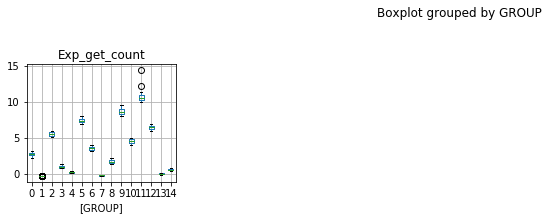

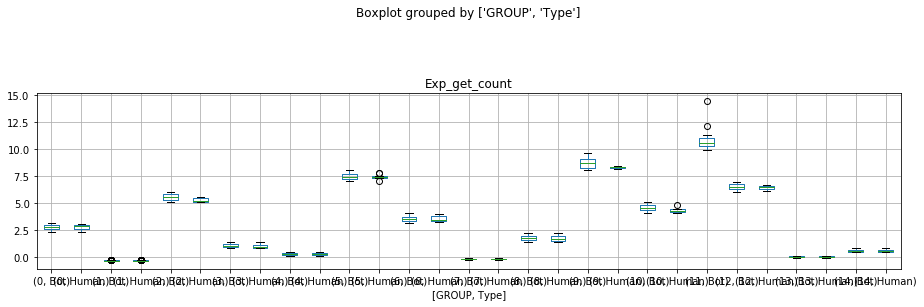

In [33]:
Exp_get_count_z_clusters = KMeans(n_clusters=15, random_state=7, n_init=10)
Exp_get_count_z_clusters.fit(Exp_get_count_z)
predicted_clusters=Exp_get_count_z_clusters.predict(Exp_get_count_z)
#
Exp_get_count_z["GROUP"] = predicted_clusters
Exp_get_count_z.boxplot(by = 'GROUP',  layout=(4,5), figsize=(15, 10))
#
Exp_get_count_z['Type'] = Player_Action_feature.Type
Exp_get_count_z.columns
Exp_get_count_z.boxplot(by = ['GROUP', 'Type'],  layout=(4,1), figsize=(15, 15))

from the above box plot we can see Bots experience action type count are having more action type compare to human.

# Analyzing data for '187-Earning game money' feature

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000239A13E4198>,
      dtype=object)

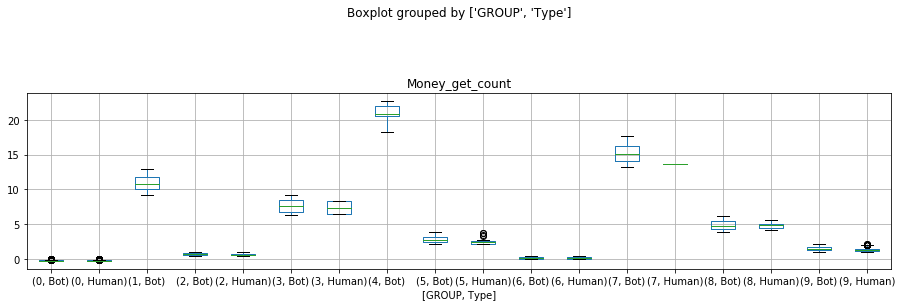

In [34]:
Money_get_count_z = Player_Action_feature[['Money_get_count']]
Money_get_count_z = Money_get_count_z.apply(zscore)
Money_get_count_z_clusters = KMeans(n_clusters=10, random_state=7, n_init=10)

# We are trying to see the clusters for the higher values here, since for lower clusters, the box plots are similar
#Money_get_count_z = Money_get_count_z[Money_get_count_z.Shop_Degree > 10]
Money_get_count_z_clusters.fit(Money_get_count_z)
predicted_clusters = Money_get_count_z_clusters.predict(Money_get_count_z)
Money_get_count_z["GROUP"] = predicted_clusters
Money_get_count_z['Type'] = Player_Action_feature.Type
Money_get_count_z.boxplot(by = ['GROUP', 'Type'],  layout=(4,1), figsize=(15, 15))

From the above box plot, in most of the cluster we can see Bots are more Earning game money, compare to human.

# Analyzing data for '202 -Obtaining items count' feature

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000239A08F43C8>,
      dtype=object)

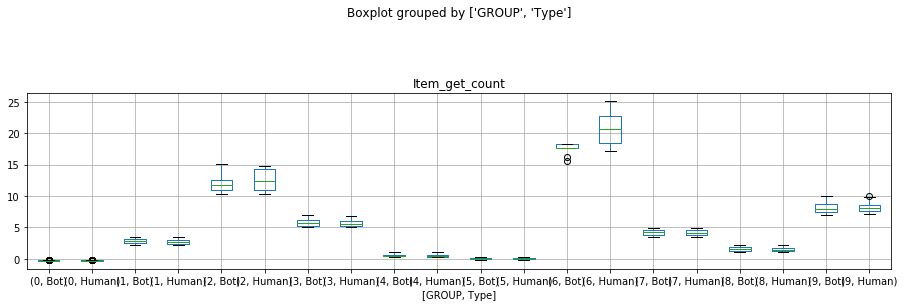

In [35]:
Item_get_count_z = Player_Action_feature[['Item_get_count']]
Item_get_count_z = Item_get_count_z.apply(zscore)
Item_get_count_z_clusters = KMeans(n_clusters=10, random_state=7, n_init=10)

# We are trying to see the clusters for the higher values here, since for lower clusters, the box plots are similar
#Item_get_count_z = Item_get_count_z[Item_get_count_z.Shop_Degree > 10]
Item_get_count_z_clusters.fit(Item_get_count_z)
predicted_clusters = Item_get_count_z_clusters.predict(Item_get_count_z)
Item_get_count_z["GROUP"] = predicted_clusters
Item_get_count_z['Type'] = Player_Action_feature.Type
Item_get_count_z.boxplot(by = ['GROUP', 'Type'],  layout=(4,1), figsize=(15, 15))

From the above Box plot,we can see most of the cluster, Human and Bot are Obtaining same item count.
but we can see in few cluster, Human have more active in obtaining item.  

# Analyzing data for '156 - Abyss count or player kill count' feature

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000239A0906A90>,
      dtype=object)

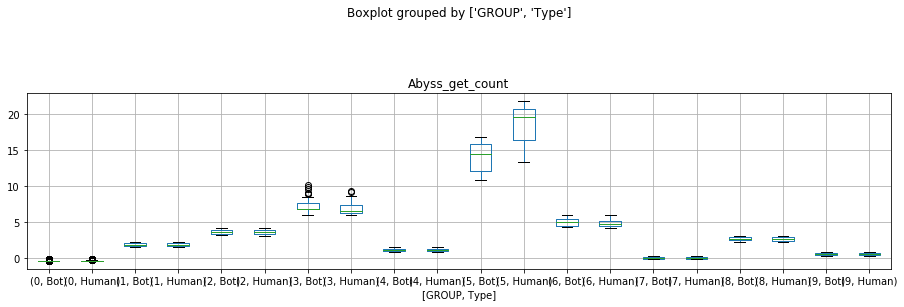

In [36]:
Abyss_get_count_z = Player_Action_feature[['Abyss_get_count']]
Abyss_get_count_z = Abyss_get_count_z.apply(zscore)
Abyss_get_count_z_clusters = KMeans(n_clusters=10, random_state=7, n_init=10)

# We are trying to see the clusters for the higher values here, since for lower clusters, the box plots are similar
#Abyss_get_count_z = Abyss_get_count_z[Abyss_get_count_z.Shop_Degree > 10]
Abyss_get_count_z_clusters.fit(Abyss_get_count_z)
predicted_clusters = Abyss_get_count_z_clusters.predict(Abyss_get_count_z)
Abyss_get_count_z["GROUP"] = predicted_clusters
Abyss_get_count_z['Type'] = Player_Action_feature.Type
Abyss_get_count_z.boxplot(by = ['GROUP', 'Type'],  layout=(4,1), figsize=(15, 15))

From the above plot, for the Density more than 10, we can see Abyss count or player kill count is more in Human play compare to Bot.

# Analyzing data for '137 -Killed by player count.' feature

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000239A02BFA58>,
      dtype=object)

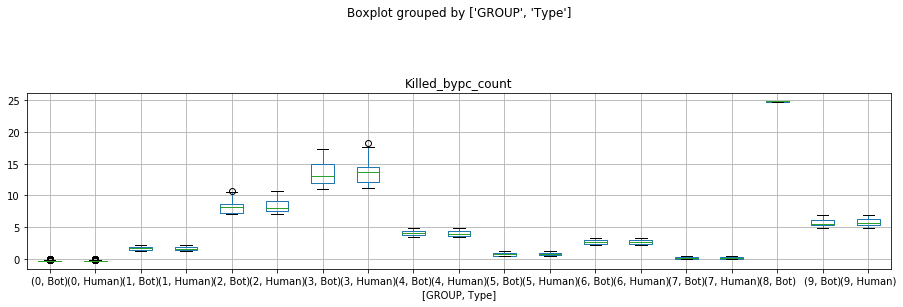

In [37]:
Killed_bypc_count_z = Player_Action_feature[['Killed_bypc_count']]
Killed_bypc_count_z = Killed_bypc_count_z.apply(zscore)
Killed_bypc_count_z_clusters = KMeans(n_clusters=10, random_state=7, n_init=10)

# We are trying to see the clusters for the higher values here, since for lower clusters, the box plots are similar
#Killed_bypc_count_z = Killed_bypc_count_z[Killed_bypc_count_z.Shop_Degree > 10]
Killed_bypc_count_z_clusters.fit(Killed_bypc_count_z)
predicted_clusters = Killed_bypc_count_z_clusters.predict(Killed_bypc_count_z)
Killed_bypc_count_z["GROUP"] = predicted_clusters
Killed_bypc_count_z['Type'] = Player_Action_feature.Type
Killed_bypc_count_z.boxplot(by = ['GROUP', 'Type'],  layout=(4,1), figsize=(15, 15))

From the above plot, for the Density looks almost same w.r.t Human and Bot player both are  Killed by player.

# Analyzing data for '138 - Killed by non player count.' feature

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000239A16915F8>,
      dtype=object)

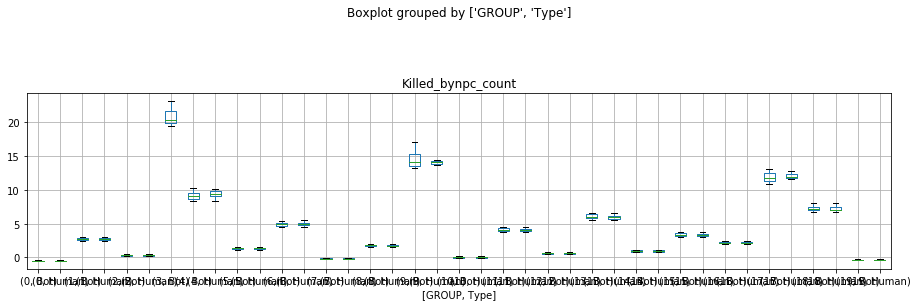

In [38]:
Killed_bynpc_count_z = Player_Action_feature[['Killed_bynpc_count']]
Killed_bynpc_count_z = Killed_bynpc_count_z.apply(zscore)
Killed_bynpc_count_z_clusters = KMeans(n_clusters=20, random_state=7, n_init=10)

# We are trying to see the clusters for the higher values here, since for lower clusters, the box plots are similar
#Killed_bynpc_count_z = Killed_bynpc_count_z[Killed_bynpc_count_z.Shop_Degree > 10]
Killed_bynpc_count_z_clusters.fit(Killed_bynpc_count_z)
predicted_clusters = Killed_bynpc_count_z_clusters.predict(Killed_bynpc_count_z)
Killed_bynpc_count_z["GROUP"] = predicted_clusters
Killed_bynpc_count_z['Type'] = Player_Action_feature.Type
Killed_bynpc_count_z.boxplot(by = ['GROUP', 'Type'],  layout=(4,1), figsize=(15, 15))

# Analyzing data for '142 -Teleport count' feature

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000239A07D3780>,
      dtype=object)

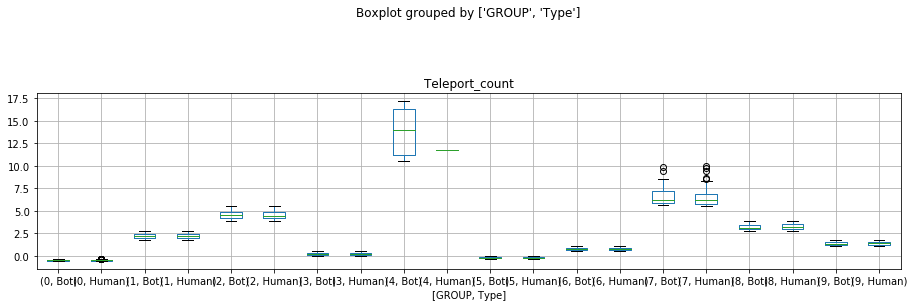

In [39]:
Teleport_count_z = Player_Action_feature[['Teleport_count']]
Teleport_count_z = Teleport_count_z.apply(zscore)
Teleport_count_z_clusters = KMeans(n_clusters=10, random_state=7, n_init=10)

# We are trying to see the clusters for the higher values here, since for lower clusters, the box plots are similar
#Teleport_count_z = Teleport_count_z[Teleport_count_z.Shop_Degree > 10]
Teleport_count_z_clusters.fit(Teleport_count_z)
predicted_clusters = Teleport_count_z_clusters.predict(Teleport_count_z)
Teleport_count_z["GROUP"] = predicted_clusters
Teleport_count_z['Type'] = Player_Action_feature.Type
Teleport_count_z.boxplot(by = ['GROUP', 'Type'],  layout=(4,1), figsize=(15, 15))

From the above box plot, we can see in some cluster Bot are more opting Teleport action.

# Analyzing data for 'Abyss ratio or player kill ratio' feature

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000239A249C438>,
      dtype=object)

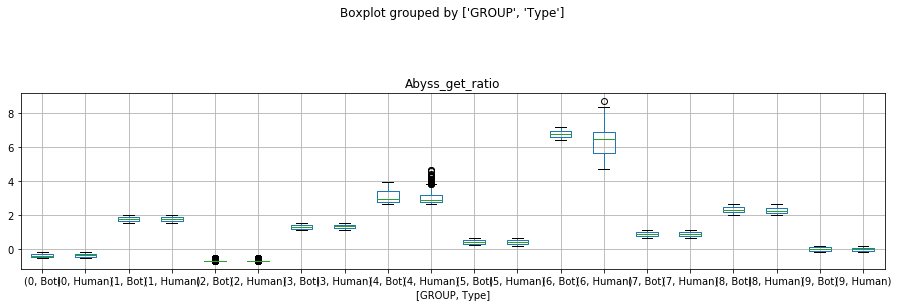

In [40]:
Abyss_get_ratio_z = Player_Action_feature[['Abyss_get_ratio']]
Abyss_get_ratio_z = Abyss_get_ratio_z.apply(zscore)
Abyss_get_ratio_z_clusters = KMeans(n_clusters=10, random_state=7, n_init=10)

# We are trying to see the clusters for the higher values here, since for lower clusters, the box plots are similar
#Abyss_get_ratio_z = Abyss_get_ratio_z[Abyss_get_ratio_z.Shop_Degree > 10]
Abyss_get_ratio_z_clusters.fit(Abyss_get_ratio_z)
predicted_clusters = Abyss_get_ratio_z_clusters.predict(Abyss_get_ratio_z)
Abyss_get_ratio_z["GROUP"] = predicted_clusters
Abyss_get_ratio_z['Type'] = Player_Action_feature.Type
Abyss_get_ratio_z.boxplot(by = ['GROUP', 'Type'],  layout=(4,1), figsize=(15, 15))

In the above Box Plot. we can also see that Player kill point ratio is slightly high in Human.

# Conclusion from the above Box Plot:
------------------------------------
1. we can see Bots experience action type count are having more action type compare to human.
2. we can see Bots are Earning more game money, compare to human.
3. we can see Human and Bot are Obtaining same item count. but we can see in few cluster, Human have more active in obtaining item.
4. we can see Abyss count or player kill count is more in Human play compare to Bot.
5. we can see Density looks almost same w.r.t Human and Bot player both are Killed by player.
6. we can see in some cluster Bot are more opting Teleport action.
7. we can also see that Player kill point ratio is slightly high in Human. 

# DENSITY CURVE ON CO-RELATED COLOUMN

Text(0,0.5,'Density')

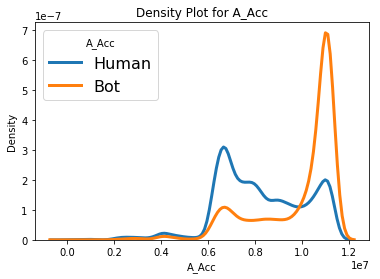

In [41]:
for player_type in ['Human','Bot']:
    subset = Player_Action_feature[Player_Action_feature.Type == player_type]
    sns.distplot(subset['A_Acc'], hist=False, kde=True,
                 kde_kws={'linewidth': 3}, label=player_type)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'A_Acc')
plt.title('Density Plot for A_Acc')
plt.xlabel('A_Acc')
plt.ylabel('Density')

Text(0,0.5,'Density')

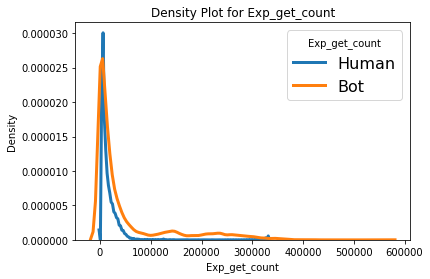

In [42]:
for player_type in ['Human','Bot']:
    subset = Player_Action_feature[Player_Action_feature.Type == player_type]
    sns.distplot(subset['Exp_get_count'], hist=False, kde=True,
                 kde_kws={'linewidth': 3}, label=player_type)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Exp_get_count')
plt.title('Density Plot for Exp_get_count')
plt.xlabel('Exp_get_count')
plt.ylabel('Density')

Text(0,0.5,'Density')

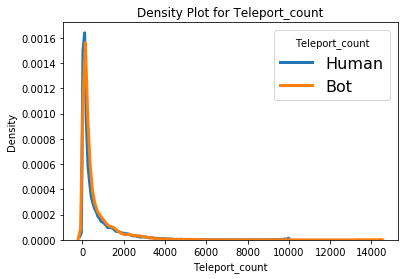

In [43]:
for player_type in ['Human','Bot']:
    subset = Player_Action_feature[Player_Action_feature.Type == player_type]
    sns.distplot(subset['Teleport_count'], hist=False, kde=True,
                 kde_kws={'linewidth': 3}, label=player_type)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Teleport_count')
plt.title('Density Plot for Teleport_count')
plt.xlabel('Teleport_count')
plt.ylabel('Density')

Text(0,0.5,'Density')

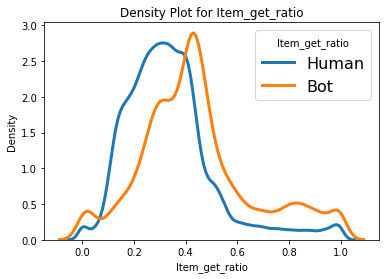

In [44]:
for player_type in ['Human','Bot']:
    subset = Player_Action_feature[Player_Action_feature.Type == player_type]
    sns.distplot(subset['Item_get_ratio'], hist=False, kde=True,
                 kde_kws={'linewidth': 3}, label=player_type)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Item_get_ratio')
plt.title('Density Plot for Item_get_ratio')
plt.xlabel('Item_get_ratio')
plt.ylabel('Density')